## Data Preprocessing 

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, accuracy_score, confusion_matrix
from localglobal import LocalGlobalConsistencyClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file = 'wdbc.data'
column_names = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data = pd.read_csv(file, header=None, names=column_names)

# Encode the 'Diagnosis' column and drop the 'ID' column
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})
data.drop('ID', axis=1, inplace=True)

# Define proportions for labeled and unlabeled data
frac_labeled, frac_unlabeled = 0.4, 0.6

# Split the dataset and remove labels from unlabeled data
labeled_df = data.sample(frac=frac_labeled, random_state=42)
unlabeled_df = data.drop(labeled_df.index).sample(frac=frac_unlabeled, random_state=42)
validation_df = data.drop(pd.concat([labeled_df, unlabeled_df]).index)

unlabeled_df.drop('Diagnosis', axis=1, inplace=True)

# Scaling
scaler = StandardScaler()
X_train_combined = pd.concat([labeled_df.drop('Diagnosis', axis=1), unlabeled_df])
X_train_scaled = scaler.fit_transform(X_train_combined)
X_val_scaled = scaler.transform(validation_df.drop('Diagnosis', axis=1))

# Extract labels and create placeholder labels for unlabeled data
y_labeled = labeled_df['Diagnosis'].values
y_val = validation_df['Diagnosis'].values
y_unlabeled = np.full(unlabeled_df.shape[0], -1)

# Combine labeled and unlabeled labels for training
y_train = np.concatenate([y_labeled, y_unlabeled])

Investigating various sigma and alpha values:

In [6]:
# Define the parameter ranges for sigma and alpha
sigma_values = [0.1, 0.5, 1.0, 2.0]
alpha_values = [0.9, 0.95, 0.99, 0.999]

# Initialize the StratifiedKFold
kf = StratifiedKFold(n_splits=5)

results_df = pd.DataFrame(columns=['Sigma', 'Alpha', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC', 'F1_Score'])

# Iterate over different values of sigma and alpha
for sigma in sigma_values:
    for alpha in alpha_values:
        print(f"Testing with sigma: {sigma} and alpha: {alpha}")
        
        # Initialize the classifier with the current sigma and alpha
        lgc = LocalGlobalConsistencyClassifier(sigma=sigma, alpha=alpha)


        # Iterate over the cross-validation splits
        for train_index, test_index in kf.split(labeled_df.drop('Diagnosis', axis=1), y_labeled):
            # Splitting the data
            X_train_fold = labeled_df.drop('Diagnosis', axis=1).iloc[train_index]
            X_test_fold = labeled_df.drop('Diagnosis', axis=1).iloc[test_index]
            y_train_fold = y_labeled[train_index]
            y_test_fold = y_labeled[test_index]

            # Fit the model
            lgc.fit(X_train_fold, y_train_fold, unlabeled_df)

            # Predict and evaluate
            y_pred_fold = lgc.predict(X_test_fold)
            precision = precision_score(y_test_fold, y_pred_fold)
            recall = recall_score(y_test_fold, y_pred_fold)
            roc_auc = roc_auc_score(y_test_fold, y_pred_fold)
            f1 = f1_score(y_test_fold, y_pred_fold)
            accuracy = accuracy_score(y_test_fold, y_pred_fold)
            conf_mat = confusion_matrix(y_test_fold, y_pred_fold)

            # Print or store the metrics
            print(f'Metrics - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, ROC AUC: {roc_auc}, F1 Score: {f1}')
            print(f'Confusion Matrix:\n{conf_mat}')

            results_df = results_df.append({
            'Sigma': sigma,
            'Alpha': alpha,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'ROC_AUC': roc_auc,
            'F1_Score': f1
        }, ignore_index=True)


Testing with sigma: 0.1 and alpha: 0.9
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6444444444444445, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[29  0]
 [16  0]]
Metrics - Accuracy: 0.6444444444444445, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[29  0]
 [16  0]]
Testing with sigma: 0.1 and alpha: 0.95
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[

/Users/rituhavaldar/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/9f/sh1nk4t55h73z7gz9x6ngpjh0000gn/T/ipykernel_27748/2209065655.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/Users/rituhavaldar/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/9f/sh1nk4t55h73z7gz9x6ngpjh0000gn/T/ipykernel_27748/2209065655.py:43: FutureWarning: The frame.append method is de

Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6444444444444445, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[29  0]
 [16  0]]
Metrics - Accuracy: 0.6444444444444445, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[29  0]
 [16  0]]
Testing with sigma: 0.1 and alpha: 0.99
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6444444444444445, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[29  0]
 [16  0]]
Metrics - Accuracy: 0.

/var/folders/9f/sh1nk4t55h73z7gz9x6ngpjh0000gn/T/ipykernel_27748/2209065655.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/Users/rituhavaldar/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/9f/sh1nk4t55h73z7gz9x6ngpjh0000gn/T/ipykernel_27748/2209065655.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/Users/rituhavaldar/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predic

Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6444444444444445, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[29  0]
 [16  0]]
Metrics - Accuracy: 0.6444444444444445, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[29  0]
 [16  0]]
Testing with sigma: 0.5 and alpha: 0.9
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]


/Users/rituhavaldar/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/9f/sh1nk4t55h73z7gz9x6ngpjh0000gn/T/ipykernel_27748/2209065655.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/Users/rituhavaldar/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/9f/sh1nk4t55h73z7gz9x6ngpjh0000gn/T/ipykernel_27748/2209065655.py:43: FutureWarning: The frame.append method is de

Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6444444444444445, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[29  0]
 [16  0]]
Metrics - Accuracy: 0.6444444444444445, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[29  0]
 [16  0]]
Testing with sigma: 0.5 and alpha: 0.95
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6444444444444445, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[29  0]
 [16  0]]
Metrics - Accuracy: 0.

/var/folders/9f/sh1nk4t55h73z7gz9x6ngpjh0000gn/T/ipykernel_27748/2209065655.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/Users/rituhavaldar/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/9f/sh1nk4t55h73z7gz9x6ngpjh0000gn/T/ipykernel_27748/2209065655.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/Users/rituhavaldar/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predic

Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6444444444444445, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[29  0]
 [16  0]]
Metrics - Accuracy: 0.6444444444444445, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[29  0]
 [16  0]]
Testing with sigma: 0.5 and alpha: 0.999
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0

/Users/rituhavaldar/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/9f/sh1nk4t55h73z7gz9x6ngpjh0000gn/T/ipykernel_27748/2209065655.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/Users/rituhavaldar/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/9f/sh1nk4t55h73z7gz9x6ngpjh0000gn/T/ipykernel_27748/2209065655.py:43: FutureWarning: The frame.append method is de

Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6444444444444445, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[29  0]
 [16  0]]
Metrics - Accuracy: 0.6444444444444445, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[29  0]
 [16  0]]
Testing with sigma: 1.0 and alpha: 0.95


/Users/rituhavaldar/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/9f/sh1nk4t55h73z7gz9x6ngpjh0000gn/T/ipykernel_27748/2209065655.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/Users/rituhavaldar/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/9f/sh1nk4t55h73z7gz9x6ngpjh0000gn/T/ipykernel_27748/2209065655.py:43: FutureWarning: The frame.append method is de

Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6444444444444445, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[29  0]
 [16  0]]
Metrics - Accuracy: 0.6444444444444445, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[29  0]
 [16  0]]
Testing with sigma: 1.0 and alpha: 0.99
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.

/Users/rituhavaldar/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/9f/sh1nk4t55h73z7gz9x6ngpjh0000gn/T/ipykernel_27748/2209065655.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/Users/rituhavaldar/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/9f/sh1nk4t55h73z7gz9x6ngpjh0000gn/T/ipykernel_27748/2209065655.py:43: FutureWarning: The frame.append method is de

Metrics - Accuracy: 0.6444444444444445, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[29  0]
 [16  0]]
Testing with sigma: 1.0 and alpha: 0.999
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6444444444444445, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[29  0]
 [16  0]]
Metrics - Accuracy: 0.6444444444444445, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[29  0]
 [16  0]]
Testing with sigma: 2.0 and alpha: 0.9
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[

/Users/rituhavaldar/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/9f/sh1nk4t55h73z7gz9x6ngpjh0000gn/T/ipykernel_27748/2209065655.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/9f/sh1nk4t55h73z7gz9x6ngpjh0000gn/T/ipykernel_27748/2209065655.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/Users/rituhavaldar/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predic

Metrics - Accuracy: 0.6521739130434783, Precision: 0.5, Recall: 0.0625, ROC AUC: 0.5145833333333334, F1 Score: 0.1111111111111111
Confusion Matrix:
[[29  1]
 [15  1]]
Metrics - Accuracy: 0.6444444444444445, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[29  0]
 [16  0]]
Metrics - Accuracy: 0.6666666666666666, Precision: 1.0, Recall: 0.0625, ROC AUC: 0.53125, F1 Score: 0.11764705882352941
Confusion Matrix:
[[29  0]
 [15  1]]
Testing with sigma: 2.0 and alpha: 0.95
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6521739130434783, Precision: 0.5, Recall: 0.0625, ROC AUC: 0.5145833333333334, F1 Score: 0.1111111111111111
Confusion Matrix:
[[29  1]
 [15  1]]
Metrics - Accuracy: 0.6444444444444445, Precision: 0.0, Recall: 0.0

/var/folders/9f/sh1nk4t55h73z7gz9x6ngpjh0000gn/T/ipykernel_27748/2209065655.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/Users/rituhavaldar/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/9f/sh1nk4t55h73z7gz9x6ngpjh0000gn/T/ipykernel_27748/2209065655.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/Users/rituhavaldar/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predic

Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6521739130434783, Precision: 0.5, Recall: 0.0625, ROC AUC: 0.5145833333333334, F1 Score: 0.1111111111111111
Confusion Matrix:
[[29  1]
 [15  1]]
Metrics - Accuracy: 0.6444444444444445, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[29  0]
 [16  0]]
Metrics - Accuracy: 0.6666666666666666, Precision: 1.0, Recall: 0.0625, ROC AUC: 0.53125, F1 Score: 0.11764705882352941
Confusion Matrix:
[[29  0]
 [15  1]]
Testing with sigma: 2.0 and alpha: 0.999
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Confusion Matrix:
[[30  0]
 [16  0]]
Metrics - Accuracy: 0.6521739130434783, Precision: 0.0, Recall: 0.0, ROC AUC: 0.5, F1 Score: 0.0
Co

/Users/rituhavaldar/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/9f/sh1nk4t55h73z7gz9x6ngpjh0000gn/T/ipykernel_27748/2209065655.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/Users/rituhavaldar/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/9f/sh1nk4t55h73z7gz9x6ngpjh0000gn/T/ipykernel_27748/2209065655.py:43: FutureWarning: The frame.append method is de

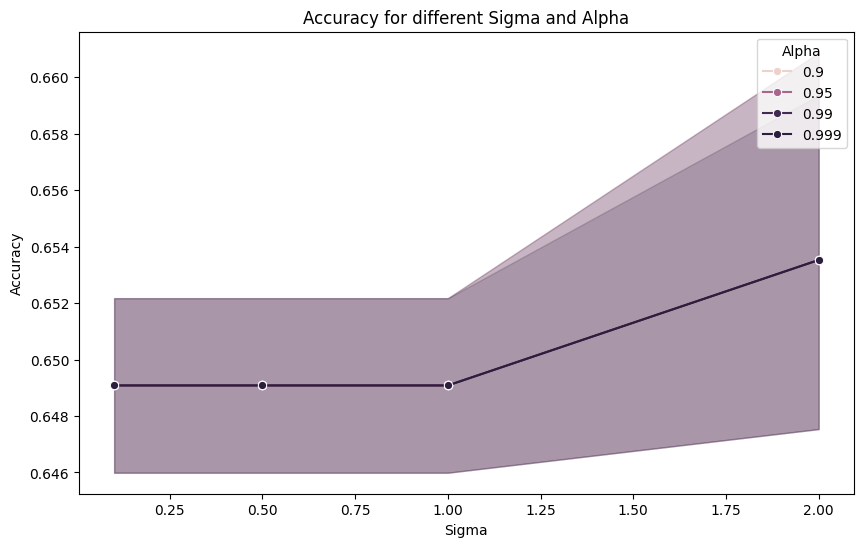

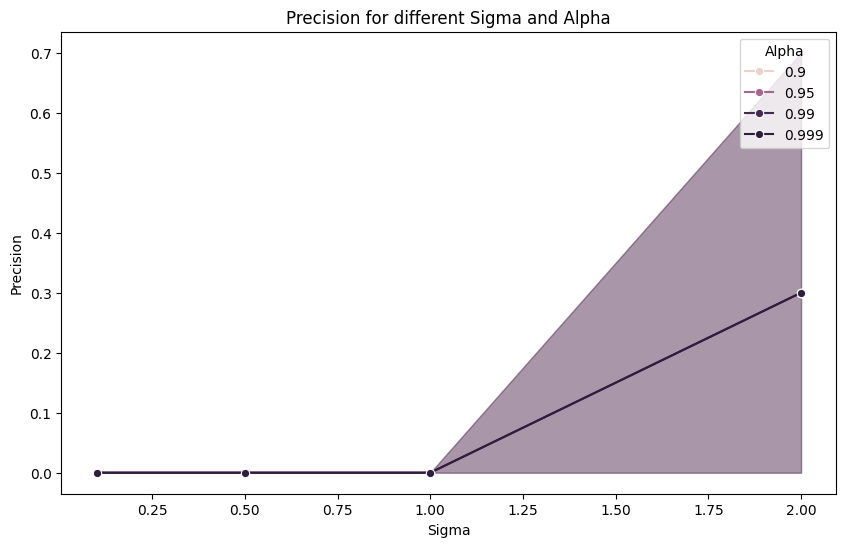

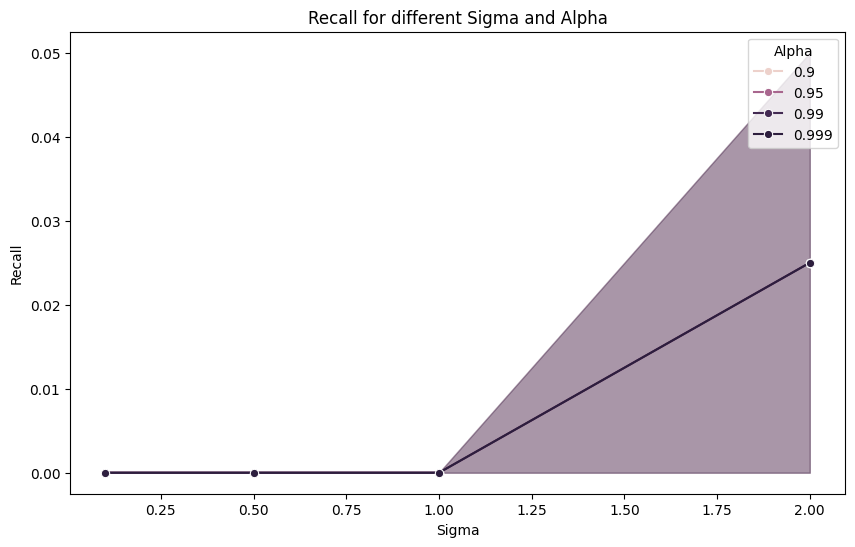

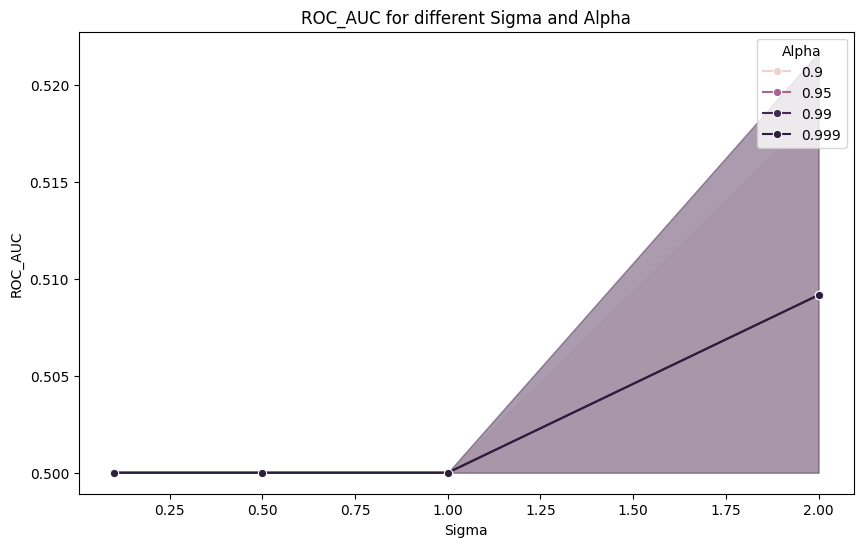

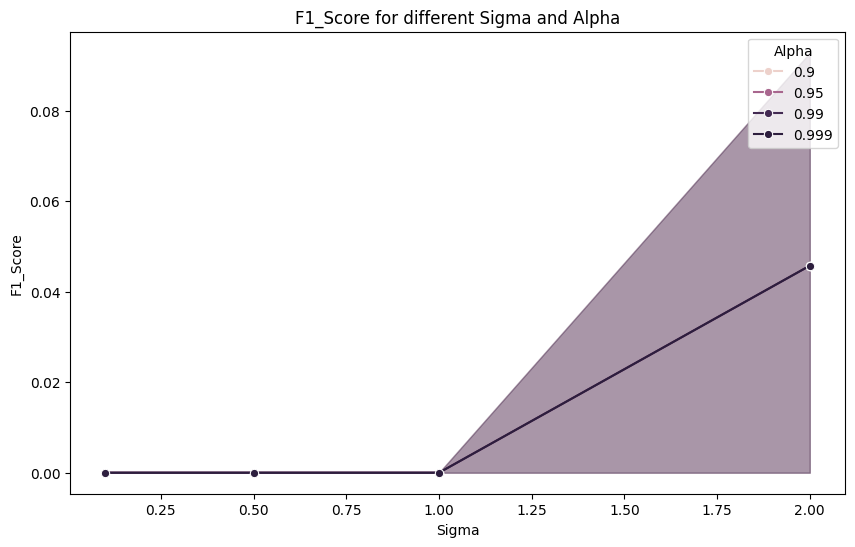

In [7]:
for metric in ['Accuracy', 'Precision', 'Recall', 'ROC_AUC', 'F1_Score']:
    plt.figure(figsize=(10, 6))
    sns_plot = sns.lineplot(data=results_df, x='Sigma', y=metric, hue='Alpha', marker='o')
    plt.title(f'{metric} for different Sigma and Alpha')
    plt.ylabel(metric)
    plt.xlabel('Sigma')
    plt.legend(title='Alpha')
    sns_plot.figure.savefig(f"{metric}_plot.png")